# <b>Assignment Python 1 "London Crime Incidents"<b>

#### Bela Devianti Retnoningsih

### **Objective:** Extracted data to answer the given question.
#### From the data analytical, could be answered the generated question. 

## **Import Primary Modules**

In [1]:
import numpy as np
import pandas as pd

## **Import matplotlib for visualization**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## **Prepping Dataset**

#### Import dataset from folder

In [3]:
dataset = pd.read_csv('dataset_crime.csv')
dataset.head(2)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


### Data Exploration

#### Find shape of the data

In [4]:
dataset.shape

(13490604, 7)

##### **Highligt:** Could be known the dataframe contains of 7 columns and 13490604 rows.

### Drop Data
##### **Highlight:** Drop the unnecessary data.

In [5]:
dataset_drop = dataset.drop(['lsoa_code', 'month'], axis=1)

In [6]:
dataset_drop

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011


### Rename the column 

In [7]:
data_renamed = dataset_drop.rename(columns={'borough':'Region','major_category':'Major Category','minor_category':'Minor Category','value':'Value','year':'Year', 'value':'Value'})

data_renamed.head()

,Region,Major Category,Minor Category,Value,Year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


#### Analytic of missing values

In [8]:
data_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Region          object
 1   Major Category  object
 2   Minor Category  object
 3   Value           int64 
 4   Year            int64 
dtypes: int64(2), object(3)
memory usage: 514.6+ MB


In [9]:
data_renamed.isnull().sum()

Region            0
Major Category    0
Minor Category    0
Value             0
Year              0
dtype: int64

###### **Highlight:** Null values is not found.

## **Visualization**

### Area Plot

##### Classify the data base on Region and Year

In [10]:
data_renamed['Year'] = data_renamed['Year'].apply(str)

# Change the data form as string

In [11]:
data_area = data_renamed.groupby(['Major Category','Year']).sum()

In [12]:
data_area.head()

Value
Major Category Year       
Burglary       2008  88092
               2009  90619
               2010  86826
               2011  93315
               2012  93392

In [13]:
data_area_plot = pd.pivot_table(data_area, values='Value', index=['Year'], columns=['Major Category'])

# Change the shape of dataframe

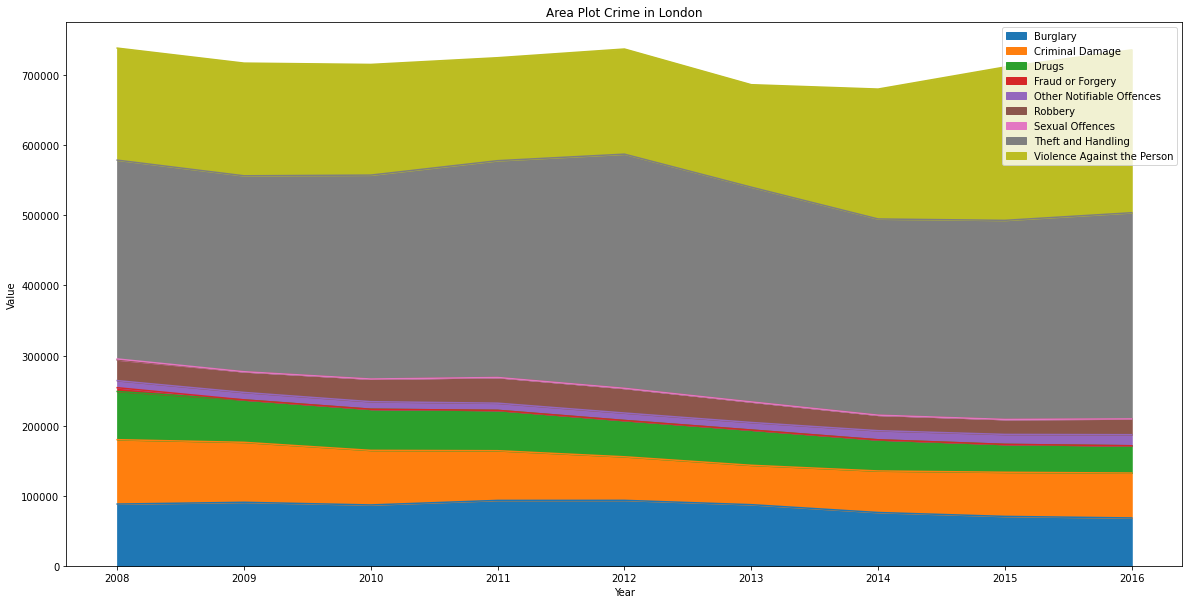

In [14]:
# Area Plotting
data_area_plot.plot(kind='area', 
                figsize=(20,10))

plt.title('Area Plot Crime in London')
plt.ylabel('Value')
plt.legend(loc='upper right')

##### **Highlight:** The cumulative crime figures in London are shown by plot area. The highest criminal category is obtained by category 'Violence Againts the Person'

### Bar Plot

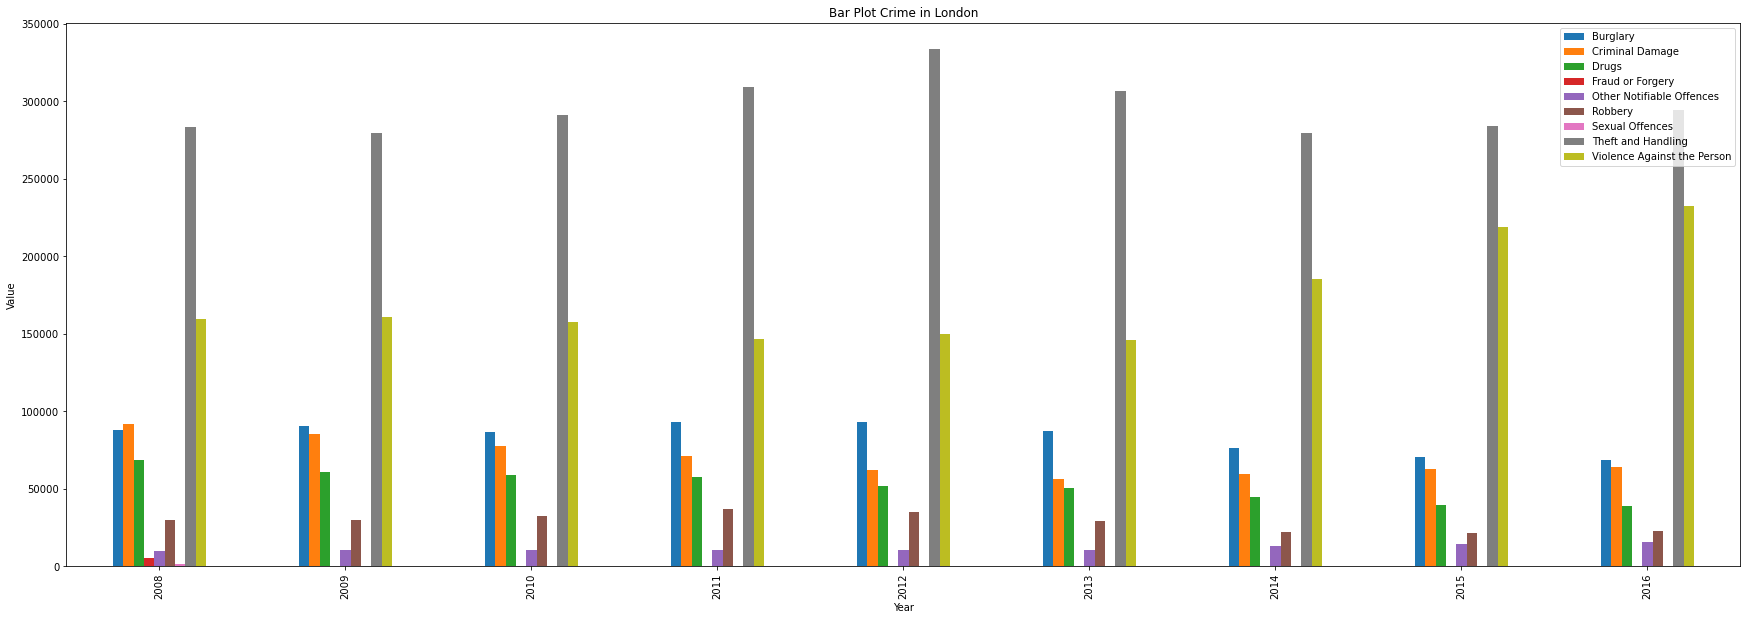

In [15]:
# Bar Plotting
data_area_plot.plot(kind='bar', 
                figsize=(30,10))

plt.title('Bar Plot Crime in London')
plt.ylabel('Value')
plt.legend(loc='upper right')

##### **Highlight:** The spread of the crime rate in London each year is represented by the bar chart above.

#### **Conclusion:** 
##### Q : The category with the highest crime rate each year?
##### A : Based on the plot bars, the category with the highest crime rate is 'Theft and Handling'.

### Histogram Plot
##### Total rate crime in 2008-2016.

In [16]:
data_histo0 = data_renamed.groupby('Year').sum()

In [17]:
data_histo0

,Value
Year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Text(0.5, 1.0, 'Histogram Plot Data Crime London')

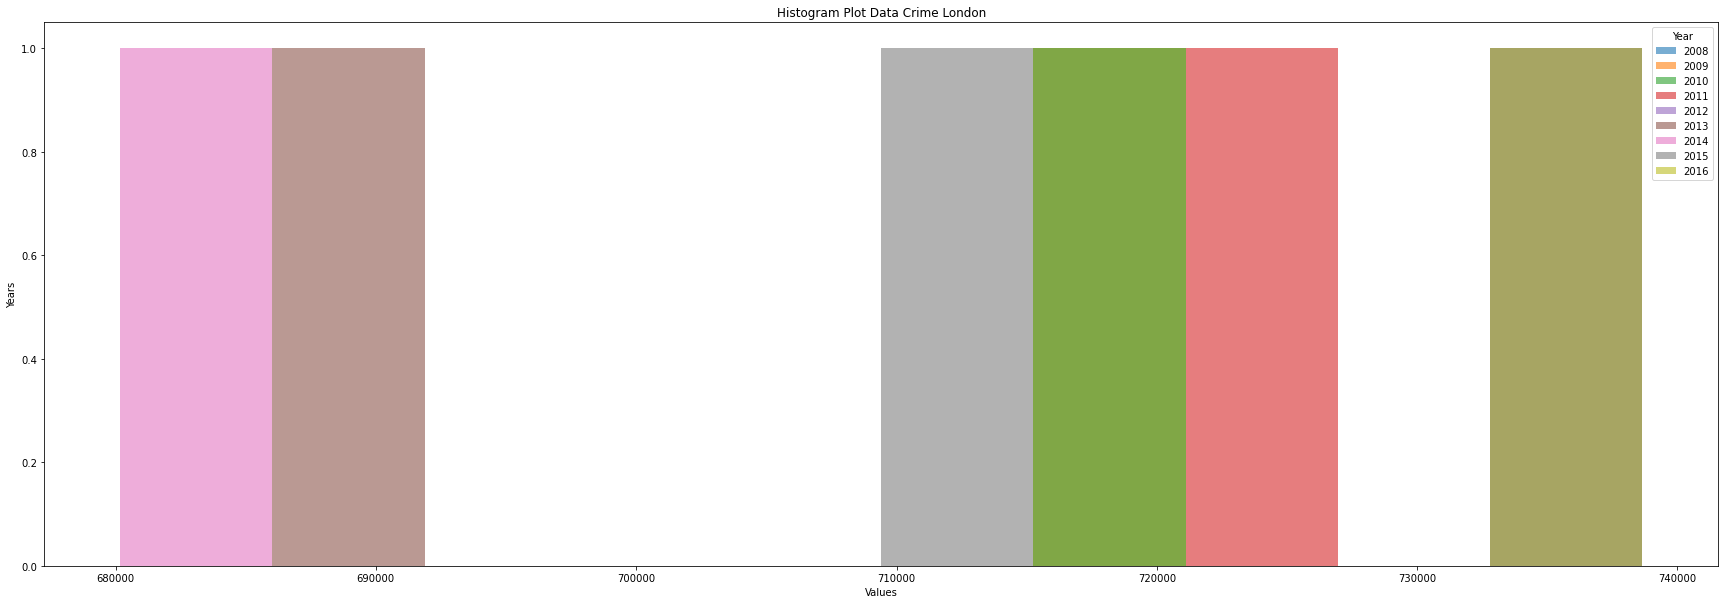

In [18]:
# Histogram Plotting
data_histo0.T.plot(kind='hist',
               figsize=(30,10),
               bins=10,
               alpha=0.6)

plt.ylabel('Years')
plt.xlabel('Values')
plt.title('Histogram Plot Data Crime London')

## Pie Chart

In [19]:
data_pie_port = data_renamed.groupby('Major Category').size()

# Calculating the amount of data distribution according to each category

In [20]:
cat_pie = data_renamed['Major Category'].unique()

# Determine the parts in the pie chart

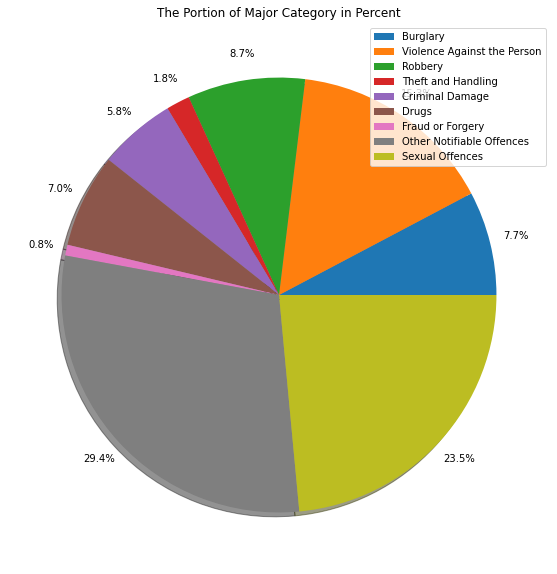

In [21]:
# Pie Chart 
plt.figure(figsize=(15,10))
plt.title('The Portion of Major Category in Percent')
pie = plt.pie(data_pie_port, 
              labels=None,
              autopct='%1.1f%%',
              shadow=True,
              pctdistance=1.12)
plt.legend(labels=cat_pie, loc='upper right')

#### **Conclusion:**
##### Other notifiable offenses have the largest crime rate while fraud or forgery has the lowest cumulative crime rate.

### Box Plot

#### **Objective:** The Data Distribution of Category 'Other Notifiable Offences' (as biggest contributor in London Data Crime) statistically.

Text(0, 0.5, 'Value')

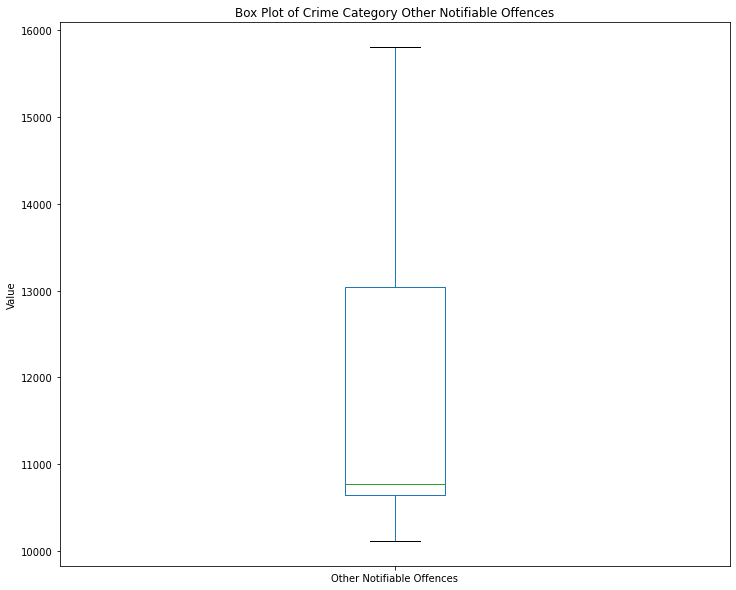

In [22]:
# Box Plotting
data_area_plot['Other Notifiable Offences'].plot(kind='box', figsize=(12,10))
plt.title('Box Plot of Crime Category Other Notifiable Offences')
plt.ylabel('Value')

#### **Conclusion:**
##### 1. Minimum value is around < 10700 furthermore the maximum value is around 13000
##### 2. The median of the data is around 10800

### Scatter Plot

#### Using the same data as the 'Histogram Plot', here are the scatter plot for the years 2008-2016.

In [23]:
data_histo0.reset_index(inplace=True)

# Membuat index yang baru

Text(0, 0.5, 'Value')

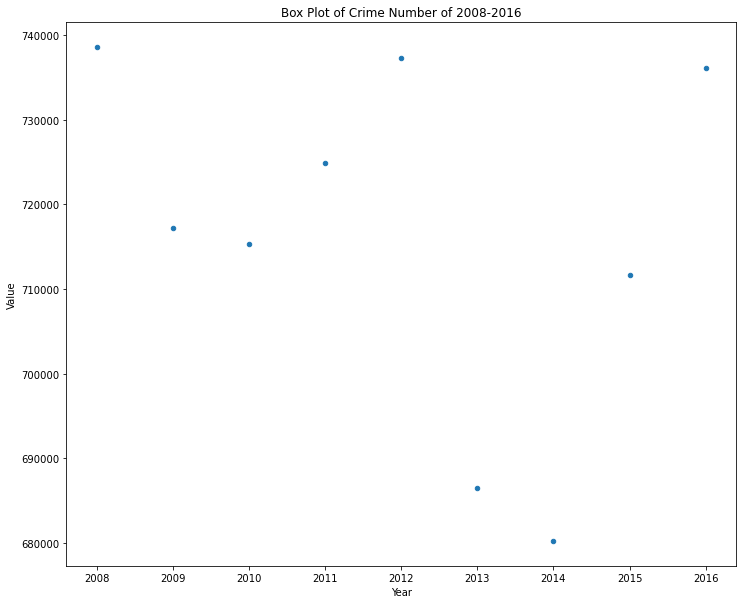

In [24]:
# Scatter Plot
data_histo0.plot(kind='scatter',
              x = 'Year',
              y = 'Value',
              figsize=(12,10))
plt.title('Box Plot of Crime Number of 2008-2016')
plt.ylabel('Value')

### Word Clouds

#### Install Package

In [25]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [26]:
data_wc = data_renamed.drop(['Value', 'Year'], axis=1)

# Extract needed data

In [27]:
data_wc

,Region,Major Category,Minor Category
0,Croydon,Burglary,Burglary in Other Buildings
1,Greenwich,Violence Against the Person,Other violence
2,Bromley,Violence Against the Person,Other violence
3,Redbridge,Burglary,Burglary in Other Buildings
4,Wandsworth,Robbery,Personal Property
...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling
13490600,Hillingdon,Robbery,Personal Property
13490601,Sutton,Burglary,Burglary in a Dwelling
13490602,Croydon,Robbery,Business Property


In [28]:
# Pembuatan Word CLouds
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

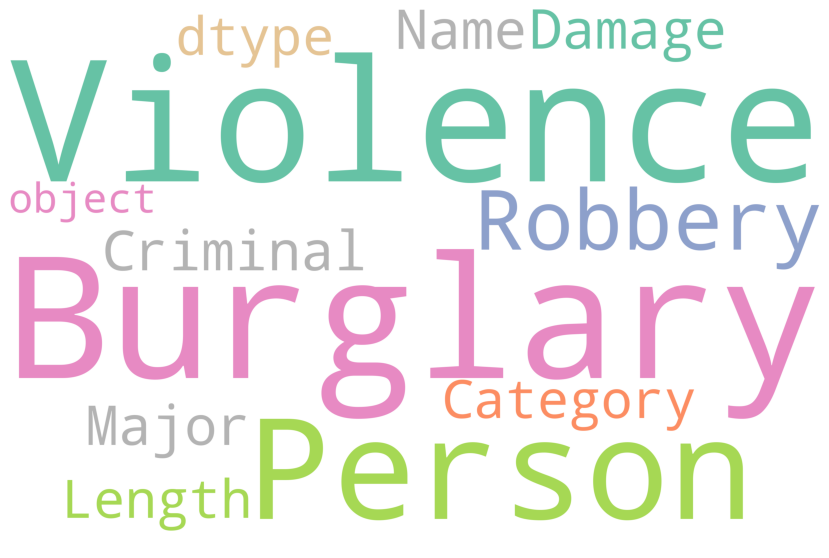

In [29]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(str(data_wc['Major Category']))

plot_cloud(wordcloud)

#### **Conclusion:**
##### Through word clouds, word statistics that often appear can be seen more easily where the largest word size has many repetitions. In this case, the most words are Burglary and Violence which are the 'Major Category'.